# Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('df_new_dummies.csv')
df.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_other
0,Fully Paid,11520.0,741.0,33694.0,584.03,12.3,10,0,6760,16056.0,...,0,0,0,1,0,0,0,0,0,0
1,Fully Paid,3441.0,734.0,42269.0,1106.04,26.3,17,0,6262,19149.0,...,0,0,0,0,0,0,0,0,0,1
2,Fully Paid,21029.0,747.0,90126.0,1321.85,28.8,5,0,20967,28335.0,...,0,0,0,1,0,0,0,0,0,0
3,Fully Paid,18743.0,747.0,38072.0,751.92,26.2,9,0,22529,43915.0,...,0,0,0,1,0,0,0,0,0,0
4,Fully Paid,11731.0,746.0,50025.0,355.18,11.5,12,0,17391,37081.0,...,0,0,0,1,0,0,0,0,0,0


## 1. Classification with all available variables

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [8]:
X=df.drop(['Loan Status'], axis=1)
y=df['Loan Status']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
c_space = np.logspace(-5, 8, 15)
param_grid={'C': c_space, 'penalty':['l2']} # [l1,'l2']
logreg = LogisticRegression(max_iter=10000)
logreg_cv = GridSearchCV(logreg, param_grid, cv=5);
logreg_cv.fit(X_train, y_train);

In [11]:
logreg_cv.best_params_

{'C': 0.0007196856730011522, 'penalty': 'l2'}

In [12]:
logreg_cv.best_score_

0.7212277894045714

In [13]:
best_model = logreg_cv.best_estimator_

In [14]:
y_pred = best_model.predict(X_test)

In [15]:
y_pred_proba=best_model.predict_proba(X_test)

In [16]:
# wrestle data to create plots:
# here I create two subsets of probabilities, one for cases that were 'Fully Paid' and 
# correctly identified as such, and one for 'Charged Off' and correctly identified as such
pred_proba_df=pd.DataFrame(data=y_pred_proba, columns=['Charged Off','Fully Paid'])
pred_proba_df['True']=y_test.values

subset_1=pred_proba_df[pred_proba_df['True']=='Fully Paid']['Fully Paid']
subset_2=pred_proba_df[pred_proba_df['True']=='Charged Off']['Charged Off']

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

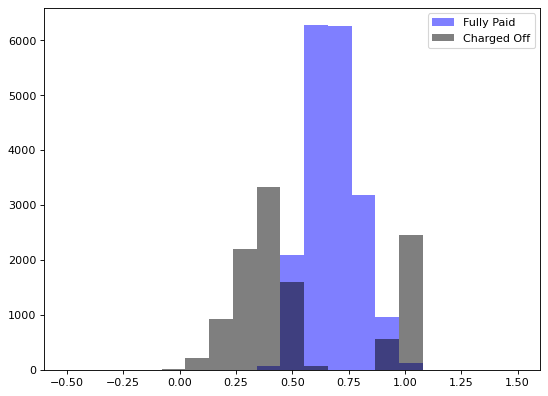

In [18]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
bins = np.linspace(-0.5, 1.5, 20)

plt.hist(subset_1, bins, color="b", alpha=0.5, label='Fully Paid')
plt.hist(subset_2, bins, color="k",alpha=0.5,label='Charged Off')
plt.legend(loc='upper right')
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[ 3588,  7860],
       [  585, 18429]], dtype=int64)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 Charged Off       0.86      0.31      0.46     11448
  Fully Paid       0.70      0.97      0.81     19014

    accuracy                           0.72     30462
   macro avg       0.78      0.64      0.64     30462
weighted avg       0.76      0.72      0.68     30462



#### Addition of categorial variables as dummies did not improve the model. In fact, the confusion matrix contains three less correctly identified 'Charged Off' cases

## 2. Remove 'unimportant' numerical variables

In [23]:
X=X.drop(['Number of Open Accounts', 'Current Credit Balance', 'Number of Credit Problems', 'Bankruptcies', 'Tax Liens'], axis =1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
c_space = np.logspace(-5, 8, 15)
param_grid={'C': c_space, 'penalty':['l2']} # [l1,'l2']
logreg = LogisticRegression(max_iter=10000)
logreg_cv = GridSearchCV(logreg, param_grid, cv=5);
logreg_cv.fit(X_train, y_train);

In [26]:
logreg_cv.best_params_

{'C': 0.006105402296585327, 'penalty': 'l2'}

In [27]:
logreg_cv.best_score_

0.7203824531166646

In [28]:
best_model = logreg_cv.best_estimator_

In [29]:
y_pred = best_model.predict(X_test)

In [30]:
y_pred_proba=best_model.predict_proba(X_test)

In [31]:
# wrestle data to create plots:
# here I create two subsets of probabilities, one for cases that were 'Fully Paid' and 
# correctly identified as such, and one for 'Charged Off' and correctly identified as such
pred_proba_df=pd.DataFrame(data=y_pred_proba, columns=['Charged Off','Fully Paid'])
pred_proba_df['True']=y_test.values

subset_1=pred_proba_df[pred_proba_df['True']=='Fully Paid']['Fully Paid']
subset_2=pred_proba_df[pred_proba_df['True']=='Charged Off']['Charged Off']

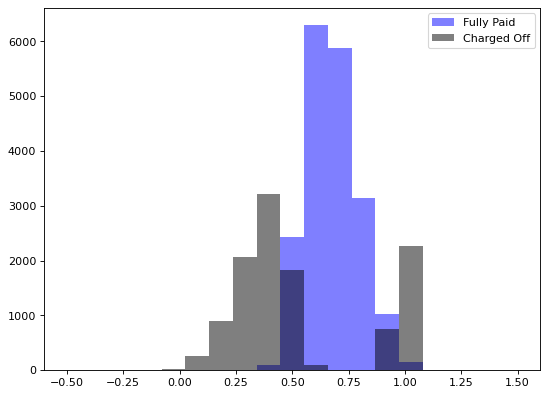

In [32]:
figure(figsize=(8, 6), dpi=80)
bins = np.linspace(-0.5, 1.5, 20)

plt.hist(subset_1, bins, color="b", alpha=0.5, label='Fully Paid')
plt.hist(subset_2, bins, color="k",alpha=0.5,label='Charged Off')
plt.legend(loc='upper right')
plt.show()

In [33]:
confusion_matrix(y_test, y_pred)

array([[ 3707,  7741],
       [  748, 18266]], dtype=int64)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 Charged Off       0.83      0.32      0.47     11448
  Fully Paid       0.70      0.96      0.81     19014

    accuracy                           0.72     30462
   macro avg       0.77      0.64      0.64     30462
weighted avg       0.75      0.72      0.68     30462



#### F1 score for Charged Off has slightly improved

In [36]:
import shap
shap.initjs()

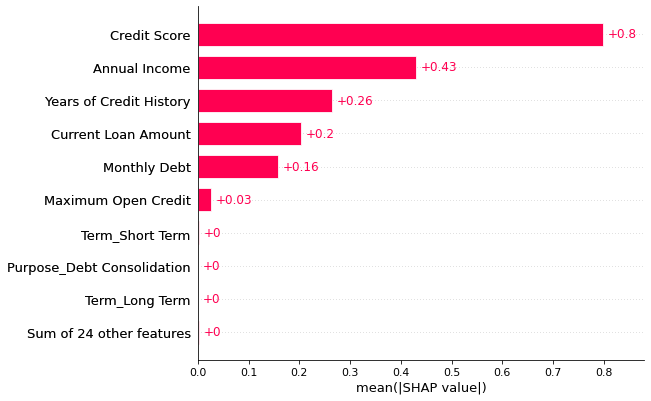

In [39]:
model = best_model
model.fit(X_train, y_train)

def model_proba(x):
    return model.predict_proba(x)[:,1]
def model_log_odds(x):
    p = model.predict_log_proba(x)
    return p[:,1] - p[:,0]

# compute SHAP values for linear
background = shap.maskers.Independent(X_train, max_samples=100)

# compute SHAP values
explainer = shap.Explainer(model, background)
shap_values = explainer(X_train)

shap.plots.bar(shap_values) # use mean absolute value of each feature over all the instances

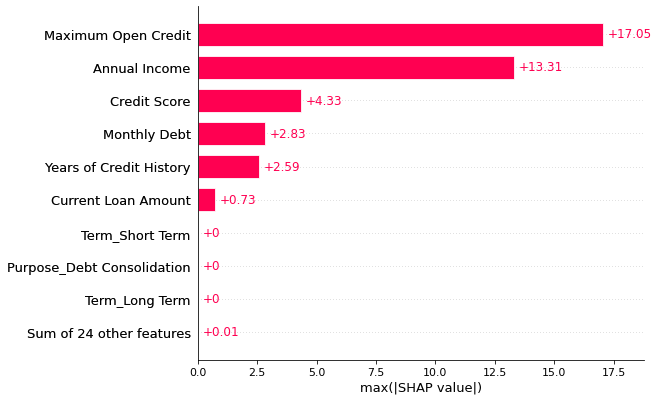

In [40]:
shap.plots.bar(shap_values.abs.max(0)) # use max absolute value 

In [ ]:
#### None of  the dummy va